<a href="https://colab.research.google.com/github/Argento27/UPSO_BD/blob/main/Proyecto_Canciones_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador CANCIONES SPOTIFY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#K-Nearest Neighbors (KNN):
from sklearn.neighbors import KNeighborsClassifier

#Support Vector Machines (SVM):
from sklearn.svm import SVC

#Árbol de decisión:
from sklearn.tree import DecisionTreeClassifier

#Bayes (Naive Bayes):
from sklearn.naive_bayes import GaussianNB

# Importa las bibliotecas para evaluación de modelos
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Importa bibliotecas para validación cruzada k-fold
from sklearn.model_selection import cross_val_score, KFold

# Importa bibliotecas para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Votacion
from sklearn.ensemble import VotingClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carga de datos

In [3]:
url = "/content/drive/MyDrive/UPSO/Canciones_Spotify.csv"
df = pd.read_csv(url)

# Verificación de valores nulos


In [4]:
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

# Dataframe completo




In [6]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


PASOS A SEGUIR:

1. Preprocesamiento de Datos
2. Evaluación de la Importancia de Características
3. Selección de Características
4. Selección de Modelos
5. Entrenamiento de los Modelos
6. Reentrenamiento de los Modelos
7. Evaluación de los Modelos

# Selección de Características: Recursive Feature Elimination (RFE).

In [7]:
# Elimina las columnas no deseadas
X = df.drop(['target', 'song_title', 'artist'], axis=1)
y = df['target']

model = LogisticRegression(solver='lbfgs', max_iter=200)


rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, y)

feature_ranking = pd.Series(fit.ranking_, index=X.columns)
sorted_features = feature_ranking.sort_values()
print('****************************************')
print('Caracteristicas evaluadas y ordenadas \n')
print(sorted_features)
print('*****************************************')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

****************************************
Caracteristicas evaluadas y ordenadas 

speechiness          1
danceability         2
instrumentalness     3
acousticness         4
valence              5
energy               6
liveness             7
loudness             8
time_signature       9
key                 10
Unnamed: 0          11
mode                12
tempo               13
duration_ms         14
dtype: int64
*****************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Caracterizticas seleccionadas

In [8]:
columnas_a_seleccionar = [
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
]

dfSeleccionada = df[columnas_a_seleccionar]
dfSeleccionada

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.833,0.434,-8.795,0.4310,0.01020,0.021900,0.1650,0.286
1,0.743,0.359,-10.401,0.0794,0.19900,0.006110,0.1370,0.588
2,0.838,0.412,-7.148,0.2890,0.03440,0.000234,0.1590,0.173
3,0.494,0.338,-15.236,0.0261,0.60400,0.510000,0.0922,0.230
4,0.678,0.561,-11.648,0.0694,0.18000,0.512000,0.4390,0.904
...,...,...,...,...,...,...,...,...
2012,0.584,0.932,-3.501,0.3330,0.00106,0.002690,0.1290,0.211
2013,0.894,0.892,-2.663,0.1310,0.08770,0.001670,0.0528,0.867
2014,0.637,0.935,-2.467,0.1070,0.00857,0.003990,0.2140,0.470
2015,0.557,0.992,-2.735,0.1330,0.00164,0.677000,0.0913,0.623


# Partimos los datos y normalizamos

In [9]:
import numpy
y = df.target
X = dfSeleccionada
print('Distribucion de targets para ver si el conjunto de datos es equilibrado:')
print(y.value_counts())

#Dividimos los conjuntos de datos en 0.20 de entrenamiento, y 0.80 de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)
# Estandarizamos las caracteristicas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Distribucion de targets para ver si el conjunto de datos es equilibrado:
1    1020
0     997
Name: target, dtype: int64


Modelos de Machine Learning:

*    KNN (K-Nearest Neighbors)
*    SVM (Support Vector Machines)
*    Árbol de decisión
*    Bayes (Naive Bayes)




In [10]:
# Dividimos los datos en características y quitamos las columnas que no evaluaremos

# Inicializamos y entrenamos los modelos
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()

knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

# Realizamos predicciones
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_naive_bayes = naive_bayes.predict(X_test)



Realizar algún tipo de validación:

*   Validación Simple
*   Validación Cruzada k-fold


**La Validación Cruzada es una técnica importante para estimar qué tan bien se desempeñarán estos modelos en datos no vistos.**

```
1. KFold:
Se crea un objeto KFold con n_splits=5,
lo que significa que se llevará a cabo una validación cruzada de 5-fold.
La validación cruzada divide el conjunto de datos en 5 partes iguales (pliegues)
y realiza 5 iteraciones, utilizando cada pliegue como conjunto de prueba una vez
y el resto de los pliegues como conjunto de entrenamiento.

2. Cross_val_score:
Esto significa que el modelo se entrena y evalúa 5 veces (en este caso)
 en pliegues diferentes del conjunto de datos.

3. Resultados:
 Muestra q tan bien se desempeñan estos modelos en promedio a lo largo
  de los 5 pliegues (*Accuracy: Medimos la proporción de predicciones correctas*.)
```


In [11]:

print("********************VALIDACIONES CRUZADAS*****************************")
# Realizamos validación cruzada k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
print('\n')

print("********************VALIDACION KNN************************************")
# Evaluamos KNN con validación cruzada
knn_scores = cross_val_score(knn, X, y, cv=kf, scoring="accuracy")
print("K-Nearest Neighbors (KNN) - Accuracy:", knn_scores.mean())

print('\n')
print("********************VALIDACION CRUZADA SVM****************************")
# Evaluamos SVM con validación cruzada
svm_scores = cross_val_score(svm, X, y, cv=kf, scoring="accuracy")
print("Support Vector Machines (SVM) - Accuracy:", svm_scores.mean())

print('\n')
print("*********************VALIDACION ARBOL*********************************")
# Evaluamos Árbol de Decisión con validación cruzada
decision_tree_scores = cross_val_score(decision_tree, X, y, cv=kf, scoring="accuracy")
print("Decision Tree - Accuracy:", decision_tree_scores.mean())
print('\n')

print("*********************VALIDACION CRUZADA NAIVE BAYES********************")
# Evaluamos Naive Bayes con validación cruzada
naive_bayes_scores = cross_val_score(naive_bayes, X, y, cv=kf, scoring="accuracy")
print("Naive Bayes - Accuracy:", naive_bayes_scores.mean())

********************VALIDACIONES CRUZADAS*****************************


********************VALIDACION KNN************************************
K-Nearest Neighbors (KNN) - Accuracy: 0.6752647225020268


********************VALIDACION CRUZADA SVM****************************
Support Vector Machines (SVM) - Accuracy: 0.6529346731199175


*********************VALIDACION ARBOL*********************************
Decision Tree - Accuracy: 0.6876434169471538


*********************VALIDACION CRUZADA NAIVE BAYES********************
Naive Bayes - Accuracy: 0.6340933100754245


In [12]:
print('--------------------------------------------------------------------------')
print('-----------------------------------KNN------------------------------------')
print('--------------------------------------------------------------------------')
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

print('--------------------------------------------------------------------------')
print('----------------------------------SVM--------------------------------------')
print('--------------------------------------------------------------------------')
print("Support Vector Machines:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print('--------------------------------------------------------------------------')
print('-------------------------------DECISION TREE-------------------------------')
print('--------------------------------------------------------------------------')
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_decision_tree))

print('--------------------------------------------------------------------------')
print('---------------------------------NAIVE BAYES-------------------------------')
print('--------------------------------------------------------------------------')
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_naive_bayes))
##print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_naive_bayes))
print("Classification Report:\n", classification_report(y_test, y_pred_naive_bayes))


--------------------------------------------------------------------------
-----------------------------------KNN------------------------------------
--------------------------------------------------------------------------
K-Nearest Neighbors:
Accuracy: 0.6782178217821783
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       200
           1       0.70      0.63      0.66       204

    accuracy                           0.68       404
   macro avg       0.68      0.68      0.68       404
weighted avg       0.68      0.68      0.68       404

--------------------------------------------------------------------------
----------------------------------SVM--------------------------------------
--------------------------------------------------------------------------
Support Vector Machines:
Accuracy: 0.7722772277227723
Classification Report:
               precision    recall  f1-score   support

           0   

# Modelo efectivo = SVM

# FUNCION CREADORA DE EVALUACION DE MODELOS

In [13]:
# Evaluamos modelos individuales
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return confusion, precision, recall, f1

confusion_knn, precision_knn, recall_knn, f1_knn = evaluate_model(knn, X_test, y_test)
confusion_svm, precision_svm, recall_svm, f1_svm = evaluate_model(svm, X_test, y_test)
confusion_decision_tree, precision_decision_tree, recall_decision_tree, f1_decision_tree = evaluate_model(decision_tree, X_test, y_test)
confusion_naive_bayes, precision_naive_bayes, recall_naive_bayes, f1_naive_bayes = evaluate_model(naive_bayes, X_test, y_test)

# MATRICES DE CONFUSION DEL PRIMER ANALISIS

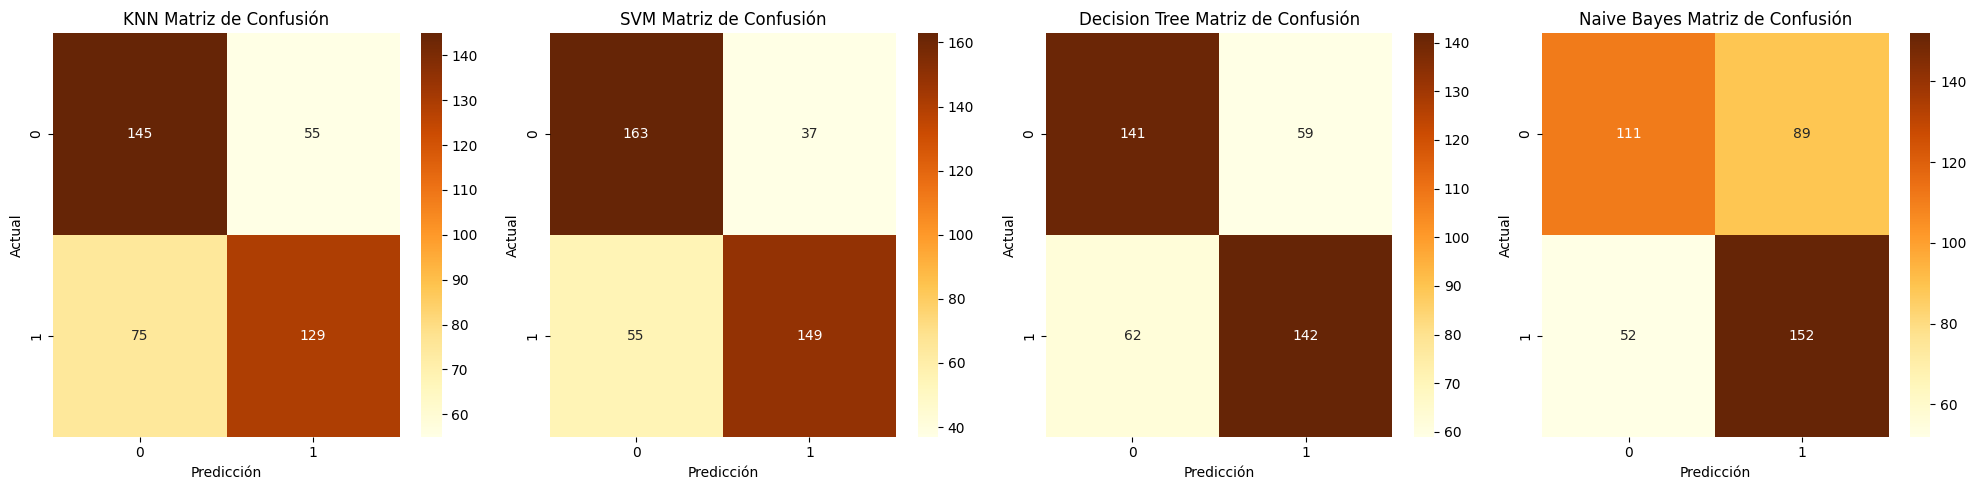

In [14]:
# Función para graficar la matriz de confusión
def plot_confusion_matrix(confusion, title, ax):
    sns.heatmap(confusion, annot=True, fmt="d", cmap="YlOrBr", ax=ax)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Crear una figura con subplots organizados en una fila
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Llamas a esta función para cada matriz de confusión
plot_confusion_matrix(confusion_knn, "KNN Matriz de Confusión", ax=axes[0])
plot_confusion_matrix(confusion_svm, "SVM Matriz de Confusión", ax=axes[1])
plot_confusion_matrix(confusion_decision_tree, "Decision Tree Matriz de Confusión", ax=axes[2])
plot_confusion_matrix(confusion_naive_bayes, "Naive Bayes Matriz de Confusión", ax=axes[3])


plt.tight_layout()
plt.show()


Ajustar para cada uno de los modelos los hiper parámetros:
1.  Grid Search
2.  Random Search

**---- OBTENDREMOS LA MEJOR VERSION DE CADA MODELO Y LUEGO EVALUAREMOS -----**


```
Grid Search:
Te permite definir un conjunto de valores de hiperparámetros para explorar
exhaustivamente todas las combinaciones posibles.

Random Search:
Es una técnica de optimización utilizada en el aprendizaje automático para encontrar
la mejor combinación de hiperparámetros de un modelo.
En lugar de evaluar todas las combinaciones posibles, selecciona de manera aleatoria
un conjunto limitado de combinaciones para entrenar y evaluar, lo que ahorra tiempo
y recursos en la búsqueda del conjunto óptimo de hiperparámetros.
```





# **RandomSearch en KNN**

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# Definir una distribución de valores para los hiperparámetros
param_dist = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Inicializar el modelo KNN
knn = KNeighborsClassifier()

# Realizar Random Search
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Evaluar el modelo con los mejores hiperparámetros
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
accuracy = best_knn.score(X_test, y_test)
print("Precisión con mejores hiperparámetros:", accuracy)

Mejores hiperparámetros: {'weights': 'distance', 'p': 1, 'n_neighbors': 5}
Precisión con mejores hiperparámetros: 0.6806930693069307


# RandomSearch para SVM


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir los rangos de valores para los hiperparámetros
param_dist = {
    'C': randint(1, 100),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

# Inicializar el Random Search para SVM
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = random_search.best_params_

# Crear un nuevo modelo SVM con los mejores hiperparámetros
best_svm = SVC(**best_params)

# Entrenar el modelo con los datos de entrenamiento
best_svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_best_svm = best_svm.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluar el modelo SVM con los mejores hiperparámetros
accuracy = accuracy_score(y_test, y_pred_best_svm)
conf_matrix = confusion_matrix(y_test, y_pred_best_svm)
class_report = classification_report(y_test, y_pred_best_svm)

print("Hiperparámetros óptimos SVC:\n", best_params)
print("Precisión:", accuracy)
print("Matriz de Confusión:\n", conf_matrix)
print("Informe de Clasificación:\n", class_report)




Hiperparámetros óptimos SVC:
 {'C': 38, 'kernel': 'rbf'}
Precisión: 0.7376237623762376
Matriz de Confusión:
 [[159  41]
 [ 65 139]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75       200
           1       0.77      0.68      0.72       204

    accuracy                           0.74       404
   macro avg       0.74      0.74      0.74       404
weighted avg       0.74      0.74      0.74       404



# Grid Search para el Arbol de Decisiones

In [17]:
from sklearn.model_selection import GridSearchCV

# Definir los valores a probar para cada hiperparámetro
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Inicializar el Grid Search para Decision Tree
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo Decision Tree con los mejores hiperparámetros
best_decision_tree = DecisionTreeClassifier(**best_params)

# Entrenar el modelo con los datos de entrenamiento
best_decision_tree.fit(X_train, y_train)

# Realizar predicciones
y_pred_best_decision_tree = best_decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best_decision_tree)
confusion = confusion_matrix(y_test, y_pred_best_decision_tree)

print("Hiperparámetros óptimos:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

Hiperparámetros óptimos: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6905940594059405
Confusion Matrix:
 [[143  57]
 [ 68 136]]


# Random Search Para Naive Bayes (no tiene hiperparametros)

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Definir los rangos de valores para los hiperparámetros
param_dist = {
    'priors': [None],  # No hay hiperparámetros específicos para ajustar en Naive Bayes
}

# Inicializar el Random Search para Naive Bayes
random_search = RandomizedSearchCV(GaussianNB(), param_distributions=param_dist, n_iter=1, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# No hay mejores hiperparámetros para ajustar en Naive Bayes, ya que no tiene hiperparámetros específicos.

# Entrenar el modelo con los datos de entrenamiento (No es necesario ajustar hiperparámetros)
best_naive_bayes = GaussianNB()
best_naive_bayes.fit(X_train, y_train)

# Realizar predicciones
y_pred_best_naive_bayes = best_naive_bayes.predict(X_test)


Realizar un ensamble de los modelos: Utilizando las MEJORES VERSIONES

*   Votación Mayoritaria


In [19]:
from sklearn.ensemble import VotingClassifier

# El ensamble de modelos mediante Votación Mayoritaria

ensemble_model = VotingClassifier(estimators=[
    ('knn', best_knn),
    ('svm', best_svm),
    ('decision_tree', best_decision_tree),
    ('naive_bayes', best_naive_bayes)
], voting='hard')  # 'hard' para votación mayoritaria

# Entrenar el ensamble de modelos en el conjunto de entrenamiento
ensemble_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluar el rendimiento del ensamble de modelos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Ensamble de Modelos (Votación Mayoritaria):")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))

Ensamble de Modelos (Votación Mayoritaria):
Accuracy: 0.6955445544554455
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.79      0.72       200
           1       0.75      0.60      0.67       204

    accuracy                           0.70       404
   macro avg       0.70      0.70      0.69       404
weighted avg       0.70      0.70      0.69       404



Evaluación y análisis del rendimiento:

*   Matriz de confusión
*   Precisión, recall y F1-score

#Matriz de confusión y algunas métricas de rendimiento del ensamble de modelos.



In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Realizar predicciones en el conjunto de prueba
y_pred_ensemble = ensemble_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular la precisión del ensamble de modelos
accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Precisión:", accuracy)

# Calcular la precisión, el recall y el F1-score para cada clase
precision = precision_score(y_test, y_pred_ensemble, average=None)
recall = recall_score(y_test, y_pred_ensemble, average=None)
f1 = f1_score(y_test, y_pred_ensemble, average=None)

print("Precisión por clase:", precision)
print("Recall por clase:", recall)
print("F1-score por clase:", f1)

# Obtener el informe de clasificación
class_report = classification_report(y_test, y_pred_ensemble)
print("Informe de Clasificación:")
print(class_report)

Matriz de Confusión:
[[158  42]
 [ 81 123]]
Precisión: 0.6955445544554455
Precisión por clase: [0.66108787 0.74545455]
Recall por clase: [0.79       0.60294118]
F1-score por clase: [0.71981777 0.66666667]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       200
           1       0.75      0.60      0.67       204

    accuracy                           0.70       404
   macro avg       0.70      0.70      0.69       404
weighted avg       0.70      0.70      0.69       404



# 2da EVALUACION


 **A continuacion mostraremos todo en 3 bloques:**

1. En el primero: La preparacion de los datos, sets, modelos y ensamble.
2. En el segundo: Matrices de confusion.
3. En el tercero: Metricas en graficos

Preparacion de datos, sets, Modelos.

In [21]:

# Separar las características (X) y las etiquetas (y)
X = df.drop(['target', 'song_title', 'artist'], axis=1)
y = df['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1)
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()

# Entrenamiento de modelos individuales
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)


# Evaluamos modelos individuales
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return confusion, precision, recall, f1

confusion_knn, precision_knn, recall_knn, f1_knn = evaluate_model(knn, X_test, y_test)
confusion_svm, precision_svm, recall_svm, f1_svm = evaluate_model(svm, X_test, y_test)
confusion_decision_tree, precision_decision_tree, recall_decision_tree, f1_decision_tree = evaluate_model(decision_tree, X_test, y_test)
confusion_naive_bayes, precision_naive_bayes, recall_naive_bayes, f1_naive_bayes = evaluate_model(naive_bayes, X_test, y_test)

# Resultados de modelos individuales
print("K-Nearest Neighbors:")
print("Confusion Matrix:", confusion_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)


# Ensamblar modelos
ensemble = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', decision_tree), ('naive_bayes', naive_bayes)], voting='hard')
ensemble.fit(X_train, y_train)

# Evaluar modelo ensamblado
confusion_ensemble, precision_ensemble, recall_ensemble, f1_ensemble = evaluate_model(ensemble, X_test, y_test)

# Resultados del modelo ensamblado
print("Ensemble Model:")
print("Confusion Matrix:", confusion_ensemble)
print("Precision:", precision_ensemble)
print("Recall:", recall_ensemble)
print("F1-score:", f1_ensemble)

K-Nearest Neighbors:
Confusion Matrix: [[199   7]
 [ 14 184]]
Precision: 0.9633507853403142
Recall: 0.9292929292929293
F1-score: 0.9460154241645244
Ensemble Model:
Confusion Matrix: [[205   1]
 [  6 192]]
Precision: 0.9948186528497409
Recall: 0.9696969696969697
F1-score: 0.9820971867007673


# `GRAFICAMOS EL TOTAL DE LOS MODELOS`

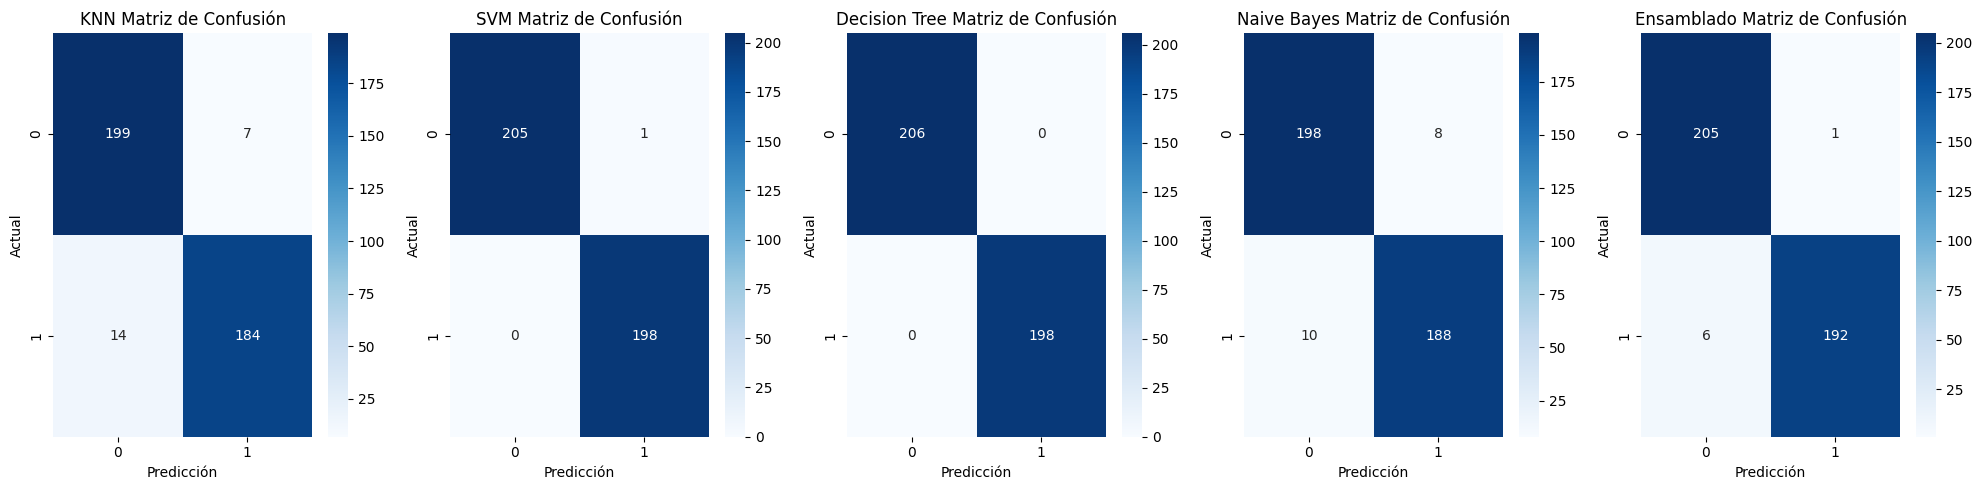

In [22]:
# Función para graficar la matriz de confusión
def plot_confusion_matrix(confusion, title, ax):
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Crear una figura con subplots organizados en una fila
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Llamas a esta función para cada matriz de confusión
plot_confusion_matrix(confusion_knn, "KNN Matriz de Confusión", ax=axes[0])
plot_confusion_matrix(confusion_svm, "SVM Matriz de Confusión", ax=axes[1])
plot_confusion_matrix(confusion_decision_tree, "Decision Tree Matriz de Confusión", ax=axes[2])
plot_confusion_matrix(confusion_naive_bayes, "Naive Bayes Matriz de Confusión", ax=axes[3])
plot_confusion_matrix(confusion_ensemble, "Ensamblado Matriz de Confusión", ax=axes[4])

plt.tight_layout()
plt.show()


# PRUEBA



In [23]:

# Ensamblar modelos
ensemble = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', decision_tree), ('naive_bayes', naive_bayes)], voting='hard')
ensemble.fit(X_train, y_train)

# Características del tema INVENTADO
tema_Evaluar = [0.3, 2.4, -2.7, -2.2, 1.5, -0.8, 3.2, -2.3, -1.1, 0.8, -2.7, 0.9, -2.5, 3.5]

# Realiza la predicción utilizando el modelo previamente entrenado (por ejemplo, el modelo "best_knn")

prediccion = ensemble.predict([tema_Evaluar])

# La variable 'prediccion' contendrá la etiqueta 1 si el modelo predice que el tema gusta, o 0 si predice que no gusta
if prediccion[0] == 1:
    print("La cancion es agradable")
else:
    print("La cancion no agrada")




La cancion no agrada
